In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('input/COVID-19.csv')

data.head(10)

,Unnamed: 0,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2020-01-22,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2020-01-22,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2020-01-22,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2020-01-22,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2020-01-22,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,2020-01-22,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,2020-01-22,Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,2020-01-22,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,2020-01-22,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data4 = data.query("Date>='2020-04-01' and Date<'2020-05-01'").reset_index(drop=True)

data4.head(-10)

,Unnamed: 0,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,13510,2020-04-01,Afghanistan,197.0,4.0,5.0,188.0,22.0,0.0,0.0
1,13511,2020-04-01,Albania,259.0,15.0,67.0,177.0,16.0,0.0,15.0
2,13512,2020-04-01,Algeria,847.0,58.0,61.0,728.0,131.0,14.0,15.0
3,13513,2020-04-01,Andorra,390.0,14.0,10.0,366.0,14.0,2.0,0.0
4,13514,2020-04-01,Angola,8.0,2.0,1.0,5.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5745,19285,2020-04-30,Turkey,120204.0,3174.0,48886.0,68144.0,2615.0,93.0,4846.0
5746,19286,2020-04-30,US,1081105.0,66184.0,153947.0,860974.0,29205.0,2181.0,33227.0
5747,19287,2020-04-30,Uganda,83.0,0.0,52.0,31.0,2.0,0.0,0.0
5748,19288,2020-04-30,Ukraine,10406.0,261.0,1238.0,8907.0,540.0,11.0,135.0


In [7]:
data4c = data4.groupby('CountryRegion')['Active'].max().reset_index()
data4cs = data4c.sort_values(by="Active", ascending=False).reset_index()


data4cs.head(8)

,index,CountryRegion,Active
0,178,US,867177.0
1,182,United Kingdom,151158.0
2,84,Italy,108257.0
3,161,Spain,101617.0
4,61,France,98578.0
5,141,Russia,93806.0
6,177,Turkey,80808.0
7,65,Germany,72864.0


##  death rate in Iran on different days

In [36]:
data_iran = data.query("CountryRegion == 'Iran'").reset_index(drop=True)
data_iran['Date'] = pd.to_datetime(data_iran['Date'],yearfirst=True)    
data_iran['New_Date'] = data_iran['Date'].map(lambda date:f'{date.year}/{date.month}/{date.day}')
data_iran.head(-10)

,Unnamed: 0,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,New_Date
0,80,2020-01-22,Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020/1/22
1,273,2020-01-23,Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020/1/23
2,466,2020-01-24,Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020/1/24
3,659,2020-01-25,Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020/1/25
4,852,2020-01-26,Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020/1/26
...,...,...,...,...,...,...,...,...,...,...,...
548,105844,2021-07-23,Iran,3645654.0,88273.0,3220445.0,336936.0,21814.0,210.0,16309.0,2021/7/23
549,106037,2021-07-24,Iran,3664286.0,88532.0,3239172.0,336582.0,18632.0,259.0,18727.0,2021/7/24
550,106230,2021-07-25,Iran,3691432.0,88800.0,3256856.0,345776.0,27146.0,268.0,17684.0,2021/7/25
551,106423,2021-07-26,Iran,3723246.0,89122.0,3274346.0,359778.0,31814.0,322.0,17490.0,2021/7/26


C:\Users\moham\AppData\Local\Temp\ipykernel_14292\1886471595.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(data_iran['New_Date'].to_numpy(dtype=str), np.log10(data_iran['New deaths'].to_numpy()))


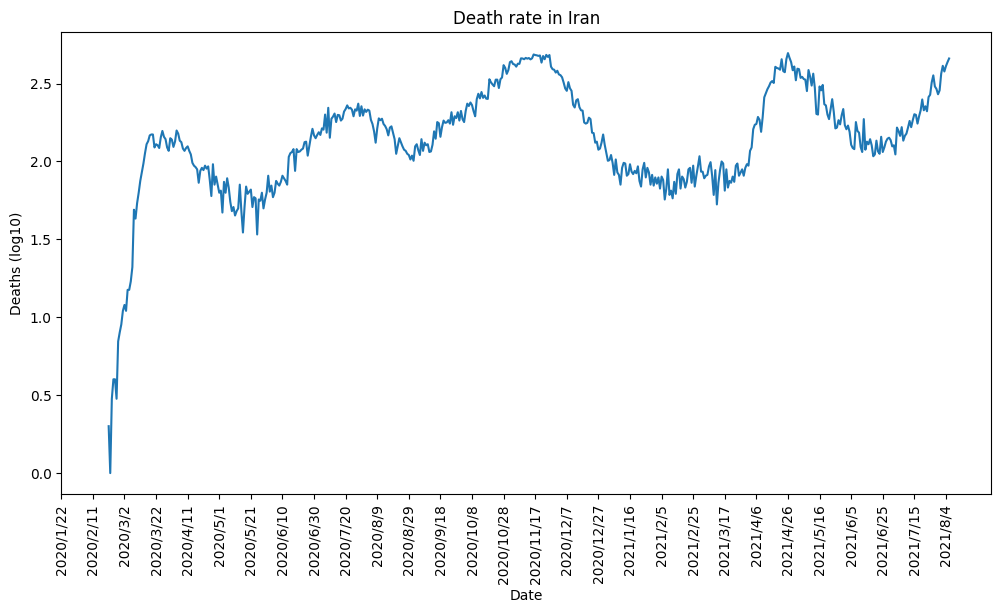

In [40]:
plt.figure(figsize=(12,6))
plt.plot(data_iran['New_Date'].to_numpy(dtype=str), np.log10(data_iran['New deaths'].to_numpy()))

plt.title('Death rate in Iran')
plt.xlabel('Date')
plt.ylabel('Deaths (log10)')
plt.xticks(rotation='vertical')
plt.xticks(np.arange(0, len(data_iran), 20))
plt.show()